# Câu 1
## Bài toán phân loại và hồi quy sử dụng các phương pháp học máy

### Mục tiêu
Sử dụng các phương pháp học máy đã học (và có thể mở rộng thêm các phương pháp khác) để giải bài toán theo cả hai hướng: phân loại (classification) và hồi quy (regression). Thực hiện quy trình gồm các bước dưới đây để xử lý và đánh giá bài toán.

---

### Các bước thực hiện

#### 1. Thống kê đặc điểm của dữ liệu bằng Data Visualization
   - Khám phá đặc điểm tổng quát của dữ liệu, bao gồm phân phối của các biến, sự tương quan giữa các đặc trưng, và xác định các mẫu dữ liệu bất thường (outliers).
   - Sử dụng các biểu đồ như histogram, boxplot, scatter plot, heatmap,... để thể hiện trực quan các đặc điểm này.

#### 2. Tiền xử lý dữ liệu
   - **Type Conversion**: Chuyển đổi kiểu dữ liệu nếu cần thiết (ví dụ: từ dạng chuỗi sang số hoặc nhãn phân loại).
   - **Data Normalization**: Chuẩn hóa dữ liệu để đưa các giá trị về cùng thang đo, tăng hiệu quả của các thuật toán học máy.

#### 3. Phân chia dữ liệu thành tập train và tập evaluation
   - Chia dữ liệu thành hai tập: **Train** và **Evaluation** theo tỷ lệ phù hợp (ví dụ 80/20 hoặc 70/30).
   - Đảm bảo rằng cả hai tập này đều có phân phối dữ liệu phù hợp để đảm bảo tính đại diện.

#### 4. Thực hiện phân loại và hồi quy
   - **Phân loại (Classification)**: Áp dụng các phương pháp phân loại khác nhau như SVM, KNN, Random Forest, hoặc các thuật toán khác.
   - **Hồi quy (Regression)**: Thử nghiệm các phương pháp hồi quy như Linear Regression, Decision Tree Regressor, SVR,...

#### 5. Đánh giá kết quả và so sánh các phương pháp
   - Đánh giá hiệu quả của các phương pháp bằng các chỉ số như độ chính xác, F1-score cho phân loại, hoặc MAE, RMSE cho hồi quy.
   - **So sánh các phương pháp**: Sử dụng biểu đồ để hiển thị kết quả của các phương pháp phân loại và hồi quy, cho phép quan sát sự khác biệt giữa các phương pháp một cách trực quan.
   - **Biểu đồ trực quan**: Ví dụ sử dụng bar chart hoặc line chart để thể hiện độ chính xác, lỗi trung bình của các phương pháp.

---

### Kết luận
Tóm tắt các kết quả đạt được từ các phương pháp phân loại và hồi quy, nêu bật phương pháp hiệu quả nhất trong việc giải quyết bài toán.


# Thêm các thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

## Lọc dữ liệu

In [4]:
pd.options.display.max_columns = None

In [5]:
rental = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', encoding='latin1')

rental.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [6]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [7]:
rental = rental.drop(columns=['id', 'title', 'body', 'price_display', 'address', 'pets_allowed', 'currency'])

In [8]:
rental.isnull().sum()

category          0
amenities      3549
bathrooms        34
bedrooms          7
fee               0
has_photo         0
price             0
price_type        0
square_feet       0
cityname         77
state            77
latitude         10
longitude        10
source            0
time              0
dtype: int64

In [9]:
#drop missing value
rental = rental.dropna()
rental = rental.reset_index(drop=True)

In [10]:
# check for missing values again
rental.isnull().sum()

category       0
amenities      0
bathrooms      0
bedrooms       0
fee            0
has_photo      0
price          0
price_type     0
square_feet    0
cityname       0
state          0
latitude       0
longitude      0
source         0
time           0
dtype: int64

In [11]:
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental[rental.duplicated(keep=False)].head(10)

There are 4 duplicate values.


,category,amenities,bathrooms,bedrooms,fee,has_photo,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
722,housing/rent/apartment,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,No,Thumbnail,1125,Monthly,529,Austin,TX,30.3054,-97.7497,RentLingo,1577014860
723,housing/rent/apartment,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,No,Thumbnail,1125,Monthly,529,Austin,TX,30.3054,-97.7497,RentLingo,1577014860
5216,housing/rent/apartment,"Dishwasher,Parking,Refrigerator,Storage",2.0,3.0,No,Thumbnail,2295,Monthly,1126,Madison,WI,43.0724,-89.4003,RentLingo,1577015758
5217,housing/rent/apartment,"Dishwasher,Parking,Refrigerator,Storage",2.0,3.0,No,Thumbnail,2295,Monthly,1126,Madison,WI,43.0724,-89.4003,RentLingo,1577015758
6008,housing/rent/apartment,"Dishwasher,Refrigerator",2.0,3.0,No,Thumbnail,1449,Monthly,1474,New Braunfels,TX,29.7398,-98.1021,RentLingo,1577358375
6009,housing/rent/apartment,"Dishwasher,Refrigerator",2.0,3.0,No,Thumbnail,1449,Monthly,1474,New Braunfels,TX,29.7398,-98.1021,RentLingo,1577358375
6010,housing/rent/apartment,"Dishwasher,Refrigerator",2.0,3.0,No,Thumbnail,1449,Monthly,1474,New Braunfels,TX,29.7398,-98.1021,RentLingo,1577358375


In [12]:
rental = rental.drop_duplicates()
rental = rental.reset_index(drop=True)

In [13]:
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental.head()

There are 0 duplicate values.


,category,amenities,bathrooms,bedrooms,fee,has_photo,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,No,Thumbnail,2475,Monthly,130,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784
1,housing/rent/apartment,Refrigerator,1.0,0.0,No,Thumbnail,1495,Monthly,138,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
2,housing/rent/apartment,Refrigerator,1.0,0.0,No,Thumbnail,1695,Monthly,190,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121
3,housing/rent/apartment,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,1560,Weekly,200,New Bern,NC,35.0847,-77.0609,ListedBuy,1576618076
4,housing/rent/apartment,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,1560,Monthly,200,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273


In [14]:
#drop value = 0
rental = rental[rental["square_feet"] != 0].reset_index(drop=True)

rental = rental[rental["bedrooms"] != 0].reset_index(drop=True)

rental = rental[rental["bathrooms"] != 0].reset_index(drop=True)


rental.head(10)

,category,amenities,bathrooms,bedrooms,fee,has_photo,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,1560,Weekly,200,New Bern,NC,35.0847,-77.0609,ListedBuy,1576618076
1,housing/rent/apartment,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,1560,Monthly,200,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273
2,housing/rent/apartment,Pool,1.0,1.0,No,Thumbnail,625,Monthly,200,Marietta,GA,33.9649,-84.5107,RentLingo,1577359224
3,housing/rent/apartment,"Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,No,Thumbnail,544,Monthly,200,Tallahassee,FL,30.4601,-84.2714,RentLingo,1577359108
4,housing/rent/apartment,Pool,1.0,1.0,No,Thumbnail,450,Monthly,200,Phoenix,AZ,33.5178,-112.0848,RentLingo,1577015539
5,housing/rent/apartment,Pool,1.0,1.0,No,Thumbnail,915,Monthly,219,Littleton,CO,39.5816,-105.0387,RentLingo,1577015007
6,housing/rent/apartment,Pool,1.0,1.0,No,Thumbnail,900,Monthly,219,Waldorf,MD,38.6210,-76.9225,RentLingo,1577015319
7,housing/rent/apartment,Pool,1.0,1.0,No,Thumbnail,865,Monthly,219,Riverview,FL,27.8492,-82.3155,RentLingo,1577015248
8,housing/rent/apartment,"Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,No,Thumbnail,942,Monthly,225,Chicago,IL,41.8625,-87.6825,RentLingo,1577359301
9,housing/rent/apartment,Dishwasher,1.0,1.0,No,Thumbnail,705,Monthly,245,Anchorage,AK,61.1723,-149.8414,RentLingo,1577359000


In [15]:
rental['category'].value_counts()

category
housing/rent/apartment     6324
housing/rent/home             2
housing/rent/short_term       1
Name: count, dtype: int64

In [16]:
rental['amenities'].value_counts()

amenities
Parking                                                                                                                                227
Dishwasher,Refrigerator                                                                                                                214
Pool                                                                                                                                   163
Dishwasher,Parking,Pool                                                                                                                149
Dishwasher                                                                                                                             145
                                                                                                                                      ... 
Basketball,Cable or Satellite,Dishwasher,Garbage Disposal,Internet Access,Patio/Deck,Playground,Pool,Refrigerator,Storage                1
Cable or Satellit

In [17]:
rental['price_type'].value_counts()

price_type
Monthly    6326
Weekly        1
Name: count, dtype: int64

In [18]:

rental = rental[rental["price_type"] != "Weekly"].reset_index(drop=True)


In [19]:
rental['square_feet'].value_counts()

square_feet
700     119
800      96
600      94
900      90
750      87
       ... 
1399      1
1395      1
1393      1
1007      1
5700      1
Name: count, Length: 1311, dtype: int64

In [20]:
rental['cityname'].value_counts()

cityname
Austin          330
Houston         152
Dallas          151
San Antonio     122
Madison         110
               ... 
Hammond           1
Gonzales          1
Roselle Park      1
Brea              1
Maricopa          1
Name: count, Length: 1127, dtype: int64

In [21]:
rental['state'].value_counts()

state
TX    1207
CA     413
MD     343
WA     332
NC     324
NJ     318
GA     287
WI     269
OH     245
FL     222
CO     203
IN     188
MO     172
IL     165
MN     146
MA     143
VA     137
PA     115
OK     106
MI      95
NV      90
AZ      83
IA      81
CT      81
NH      59
OR      51
TN      45
SC      41
KS      39
NE      38
NY      35
SD      33
AK      33
UT      29
AR      28
DC      24
LA      24
KY      23
AL      13
VT      11
ND       9
RI       8
ID       4
MT       3
MS       3
NM       2
DE       2
ME       1
WV       1
WY       1
HI       1
Name: count, dtype: int64

Check For Outlier

In [22]:
print(rental["price"].describe())

count     6326.000000
mean      1399.168353
std        807.129044
min        224.000000
25%        930.250000
50%       1225.000000
75%       1599.000000
max      19500.000000
Name: price, dtype: float64


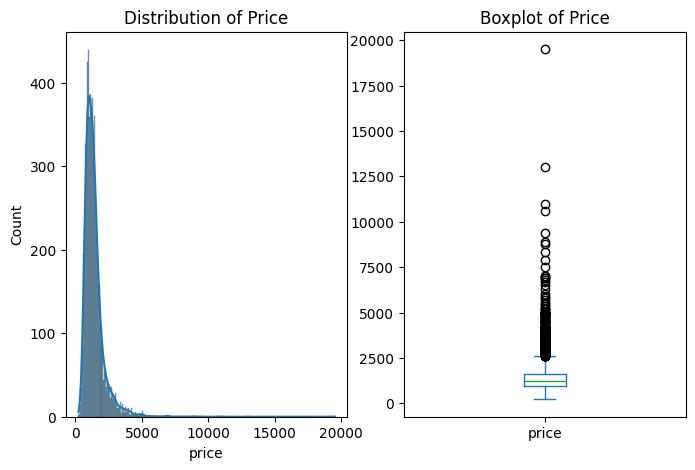

In [23]:
plt.figure(figsize=(16, 5))

# Biểu đồ phân phối (distribution plot) cho cột price
plt.subplot(121)
sns.histplot(rental["price"], kde=True)
plt.title("Distribution of Price")

# Boxplot cho cột price
plt.subplot(122)
rental["price"].plot.box(figsize=(8, 5))
plt.title("Boxplot of Price")

plt.show()


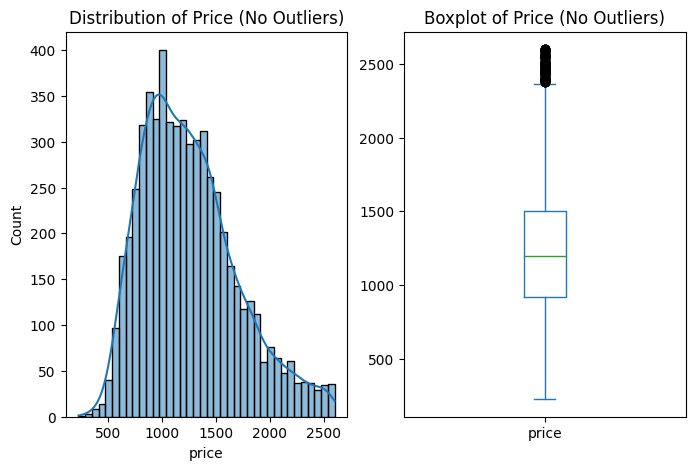

In [24]:
import numpy as np

# Tính Q1, Q3 và IQR cho cột price
Q1 = rental["price"].quantile(0.25)
Q3 = rental["price"].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên để xác định ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị không nằm trong khoảng ngoại lệ
rental = rental[(rental["price"] >= lower_bound) & (rental["price"] <= upper_bound)]

# Kiểm tra lại phân phối sau khi loại bỏ ngoại lệ
plt.figure(figsize=(16, 5))

# Biểu đồ phân phối mới
plt.subplot(121)
sns.histplot(rental["price"], kde=True)
plt.title("Distribution of Price (No Outliers)")

# Boxplot mới
plt.subplot(122)
rental["price"].plot.box(figsize=(8, 5))
plt.title("Boxplot of Price (No Outliers)")

plt.show()


In [25]:
print(rental["price"].describe())

count    5943.000000
mean     1253.420999
std       442.840510
min       224.000000
25%       919.000000
50%      1195.000000
75%      1500.000000
max      2600.000000
Name: price, dtype: float64


Text(0, 0.5, 'Price')

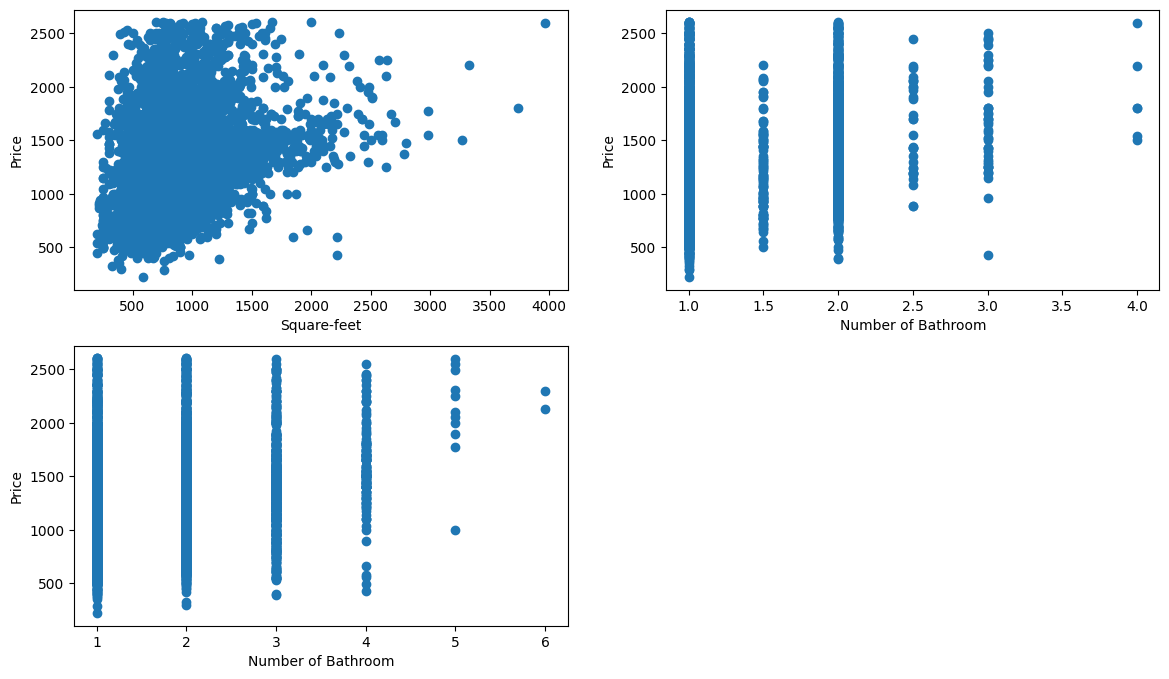

In [26]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.scatter(x=rental["square_feet"], y=rental["price"])
plt.xlabel("Square-feet")
plt.ylabel("Price")

plt.subplot(2,2,2)
plt.scatter(x=rental["bathrooms"], y=rental["price"])
plt.xlabel("Number of Bathroom")
plt.ylabel("Price")

plt.subplot(2,2,3)
plt.scatter(x=rental["bedrooms"], y=rental["price"])
plt.xlabel("Number of Bathroom")
plt.ylabel("Price")

In [27]:
# calculate correlation matrix
corr = rental[["bathrooms", "bedrooms","square_feet","price"]].corr()
corr

,bathrooms,bedrooms,square_feet,price
bathrooms,1.000000,0.636911,0.715506,0.313336
bedrooms,0.636911,1.000000,0.687315,0.248364
square_feet,0.715506,0.687315,1.000000,0.344493
price,0.313336,0.248364,0.344493,1.000000


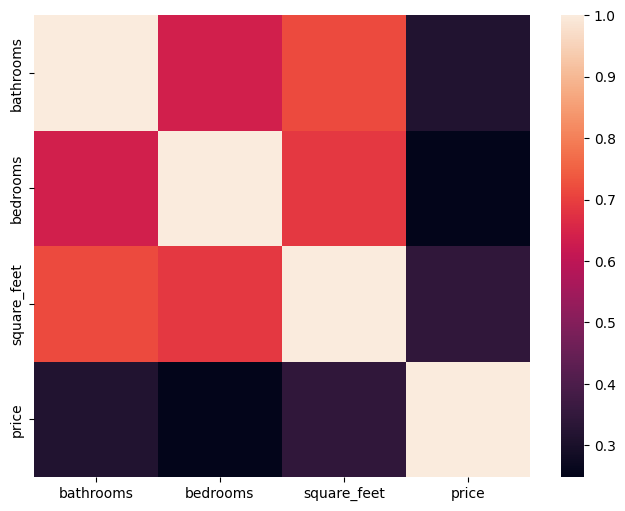

In [28]:
# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


-----
## Bước 2: Tiền xử lý dữ liệu


Type Conversion

In [29]:
rental_df = pd.get_dummies(rental)
rental_df.head()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,category_housing/rent/apartment,category_housing/rent/home,category_housing/rent/short_term,amenities_AC,"amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Dishwasher,Fireplace,Gated,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Dishwasher,Internet Access,Patio/Deck,Washer Dryer","amenities_AC,Alarm,Clubhouse,Gym,Parking,Patio/Deck,Playground,Pool,Tennis","amenities_AC,Basketball,Cable or Satellite","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Doorman,Fireplace,Gated,Gym,Hot Tub,Internet Access,Parking,Patio/Deck,Pool,Storage,Washer Dryer,Wood Floors","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Elevator,Garbage Disposal,Gated,Gym,Hot Tub,Internet Access,Parking,Patio/Deck,Playground,Pool,Tennis","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Elevator,Gated,Gym,Parking,Patio/Deck,Pool,Refrigerator,Storage,Tennis","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Storage,Tennis,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Parking,Patio/Deck,Pool,Refrigerator,Storage,TV,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Garbage Disposal,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gym,Hot Tub,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,Tennis,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Tennis,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gym,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gym,Patio/Deck,Pool,Refrigerator,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gym,Playground,Pool,Storage,TV,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Elevator,Fireplace,Gated,Gym,Parking,Pool,Storage,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Clubhouse,Gym,Patio/Deck","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Elevator,Fireplace,Gym,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,TV,Tennis,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Fireplace,Gym,Hot Tub,Internet Access,Parking,Patio/Deck,Playground,Pool,Refrigerator,Storage,Tennis,Washer Dryer,Wood Floors","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Fireplace,Gym,Hot Tub,Internet Access,Patio/Deck,Refrigerator,Storage,TV,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Fireplace,Gym,Patio/Deck,Pool","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Gated,Gym,Hot Tub,Parking,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Gym,Internet Access,Parking,Patio/Deck,Storage,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Gym,Parking,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Gym,Patio/Deck,Playground,Pool,Refrigerator,Tennis,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Gym,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Gym,Patio/Deck,Playground,Refrigerator,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Internet Access,Patio/Deck,Washer Dryer","amenities_AC,Basketball,Cable or Satellite,Dishwasher,Pat

Data Normalization

In [30]:
# # Khởi tạo MinMaxScaler với phạm vi chuẩn hóa (0, 1)
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Danh sách các cột cần chuẩn hóa
# numerical_cols = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time']

# # Chọn các cột cần chuẩn hóa và thực hiện fit_transform
# rental_df[numerical_cols] = scaler.fit_transform(rental_df[numerical_cols])

# # Kiểm tra kết quả
# print(rental_df[numerical_cols].head())


-----
## Bước 3: Phân chia dữ liệu thành tập train và evaluation

In [31]:
X = rental_df.drop(columns=['price'])
y_reg = rental_df['price']

median = np.median(y_reg)
y_class = (rental_df['price']>median).astype(int)

# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=0)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=0)


--------


## Bước 4: Xây dựng mô hình

### Hồi quy

In [32]:
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=0)
dt_reg = DecisionTreeRegressor()

In [33]:
linear_reg.fit(X_train, y_train_reg)
rf_reg.fit(X_train, y_train_reg)
dt_reg.fit(X_train, y_train_reg)

DecisionTreeRegressor()

In [34]:
# make predictions
y_pred_lin_reg = linear_reg.predict(X_test)
y_pred_forest_reg = rf_reg.predict(X_test)
y_pred_tree_reg = dt_reg.predict(X_test)

In [35]:


lin_r2 = r2_score(y_test_reg, y_pred_lin_reg)
print("Linear Regression R-squared: {}".format(lin_r2))

forest_r2 = r2_score(y_test_reg, y_pred_forest_reg)
print("Random Forest R-squared: {}".format(forest_r2))

decision_r2 = r2_score(y_test_reg, y_pred_tree_reg)
print("Random Forest R-squared: {}".format(decision_r2))

Linear Regression R-squared: 0.47120418823874155
Random Forest R-squared: 0.7029838981670271
Random Forest R-squared: 0.5284647658769817


In [36]:
# calculate root mean squared error (RMSE)


lin_mse = mean_squared_error(y_pred_lin_reg, y_test_reg)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

forest_mse = mean_squared_error(y_pred_forest_reg, y_test_reg)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))


decision_mse = mean_squared_error(y_pred_tree_reg, y_test_reg)
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree Regression RMSE: {}".format(decision_rmse))

Linear Regression RMSE: 321.7365185551917
Random Forest Regression RMSE: 241.1272825028319
Decision Tree Regression RMSE: 303.8179503862766


In [37]:
# calculate mean absolute error (MAE)


lin_mae = mean_absolute_error(y_pred_lin_reg, y_test_reg)
print("Liner Regression MAE: {}".format(lin_mae))
forest_mae = mean_absolute_error(y_pred_forest_reg, y_test_reg)
print("Random Forest Regression MAE: {}".format(forest_mae))

decision_mae = mean_absolute_error(y_pred_tree_reg, y_test_reg)
print("Decision Tree Regression MAE: {}".format(decision_mae))

Liner Regression MAE: 223.4214275626088
Random Forest Regression MAE: 172.82277986369766
Decision Tree Regression MAE: 216.25175217269413


### Phân loại

In [38]:
log_reg = LogisticRegression(max_iter=200)
rf_cls = RandomForestClassifier()
dt_cls = DecisionTreeClassifier()

In [39]:
#Huấn luyện
log_reg.fit(X_train, y_train_class)
rf_cls.fit(X_train, y_train_class)
dt_cls.fit(X_train,y_train_class)


DecisionTreeClassifier()

In [40]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_cls = rf_cls.predict(X_test)
y_pred_dt_cls = dt_cls.predict(X_test)


In [41]:
acc_log_reg = accuracy_score(y_test_class, y_pred_log_reg)
acc_pred_rf_cls =accuracy_score(y_test_class, y_pred_rf_cls)
acc_dt_cls = accuracy_score(y_test_class, y_pred_dt_cls)


In [42]:
print("Accuracy of Logistic Regression:\n",acc_log_reg)
print("Accuracy of Random Forest:\n",acc_pred_rf_cls)
print("Accuracy of Decision Tree:\n",acc_dt_cls )


Accuracy of Logistic Regression:
 0.6341463414634146
Accuracy of Random Forest:
 0.8359966358284272
Accuracy of Decision Tree:
 0.7981497056349874


----
## Bước 5: Đánh giá kết quả

In [43]:
data = {"Model":["Linear Regression","Random Forest","Decision Tree"],
        "R-squared":[lin_r2,forest_r2,decision_r2],
        "RMSE":[lin_rmse, forest_rmse,decision_rmse],
        "MAE":[lin_mae, forest_mae,decision_mae]}
results = pd.DataFrame(data=data)
results

,Model,R-squared,RMSE,MAE
0,Linear Regression,0.471204,321.736519,223.421428
1,Random Forest,0.702984,241.127283,172.822780
2,Decision Tree,0.528465,303.817950,216.251752


In [44]:
data1 = {"Model":["Logistic Regression","Random Forest","Decision Tree"],
        "Accuracy":[acc_log_reg, acc_dt_cls,acc_pred_rf_cls] }
result1 = pd.DataFrame(data=data1)
result1


,Model,Accuracy
0,Logistic Regression,0.634146
1,Random Forest,0.798150
2,Decision Tree,0.835997


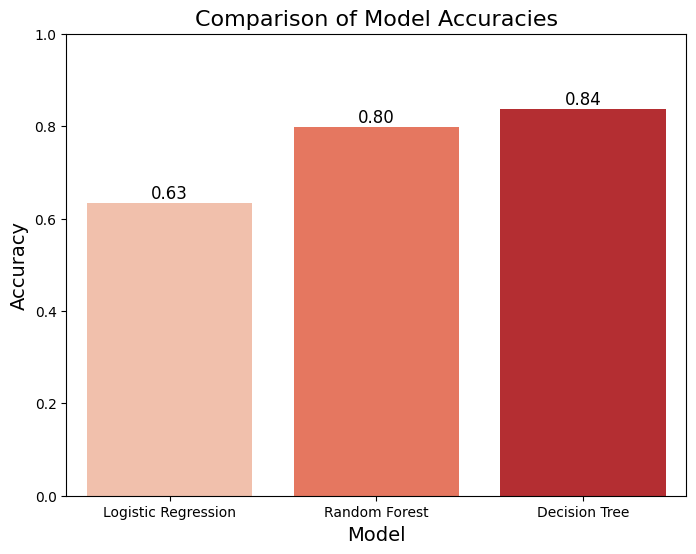

In [45]:
# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(8, 6))

# Vẽ biểu đồ cột cho cột "Model" và "Accuracy" trong result1
sns.barplot(x="Model", y="Accuracy", data=result1, hue="Model", palette="Reds")

# Thêm tiêu đề và nhãn cho trục y
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)

# Thêm giá trị ở trên các cột
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.ylim(0, 1)  
plt.show()

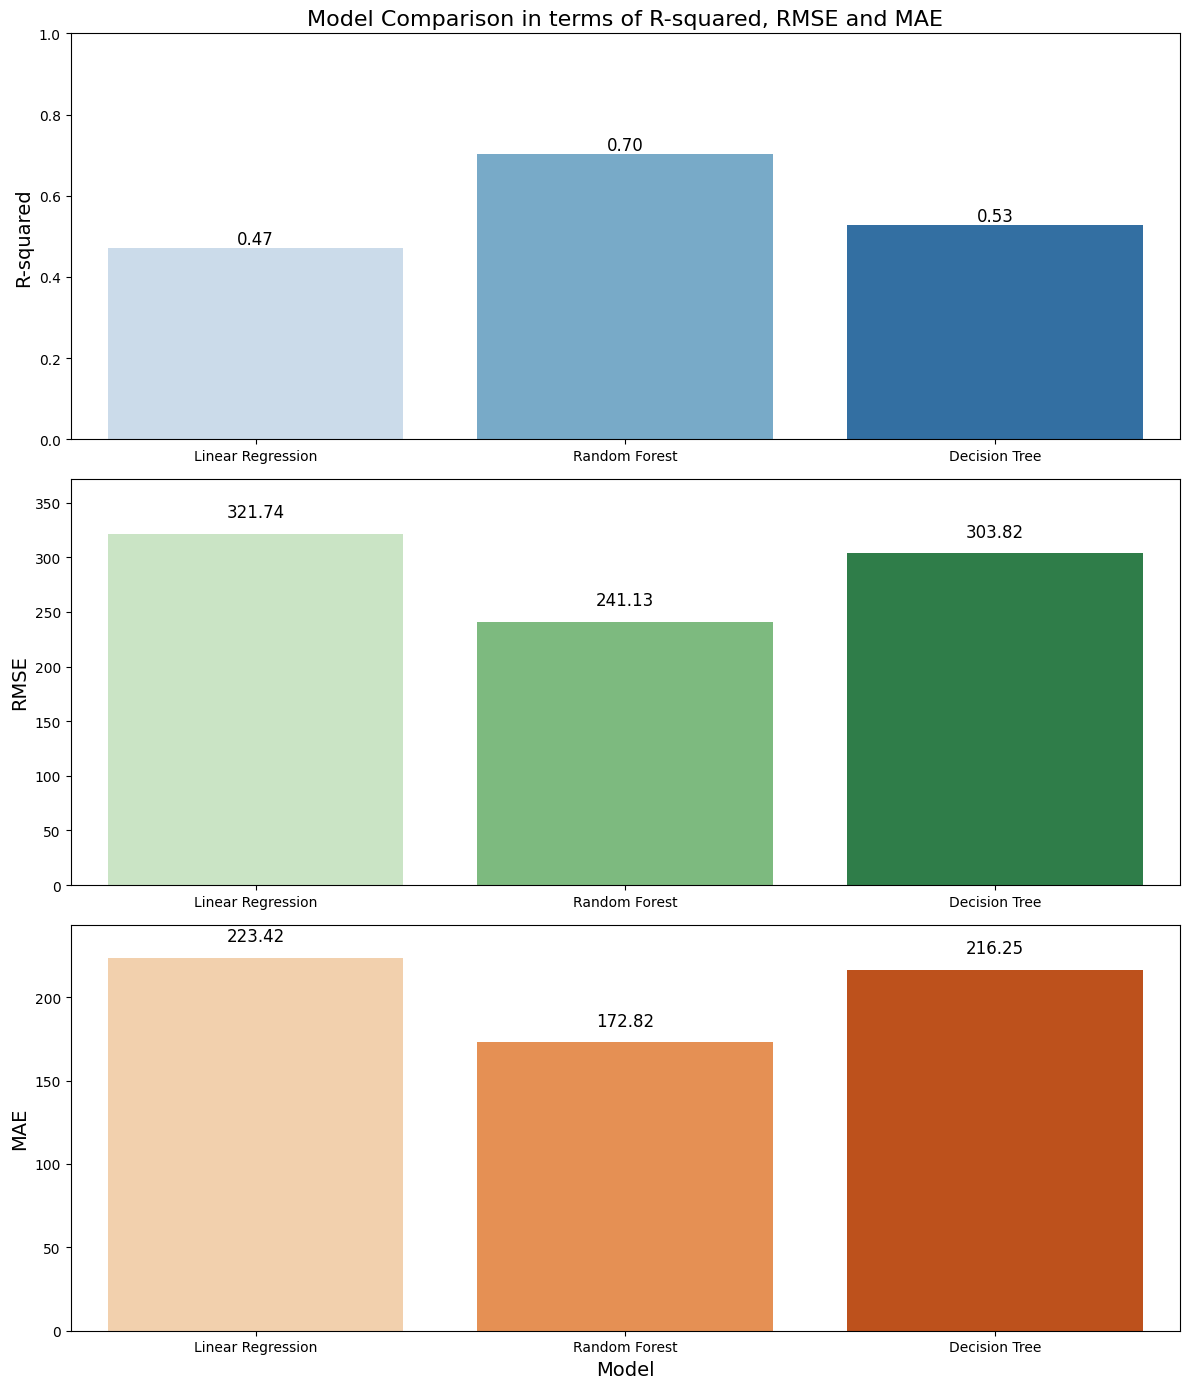

In [46]:
plt.figure(figsize=(12, 14))

# Biểu đồ cho R-squared
plt.subplot(3, 1, 1)
plt.title("Model Comparison in terms of R-squared, RMSE and MAE", fontsize=16)
sns.barplot(x="Model", y="R-squared", data=results, hue="Model", palette="Blues")
plt.ylim(0, 1)  # Đặt giới hạn cho trục y để R-squared dễ so sánh
plt.xlabel("")
plt.ylabel("R-squared", fontsize=14)

# Thêm giá trị lên trên các cột của R-squared
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', fontsize=12)

# Biểu đồ cho RMSE
plt.subplot(3, 1, 2)
sns.barplot(x="Model", y="RMSE", data=results, hue="Model", palette="Greens")
plt.ylim(0, max(results["RMSE"]) + 50)  # Điều chỉnh trục y dựa trên giá trị RMSE cao nhất
plt.xlabel("")
plt.ylabel("RMSE", fontsize=14)

# Thêm giá trị lên trên các cột của RMSE
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 15, f'{height:.2f}', ha='center', fontsize=12)

# Biểu đồ cho MAE
plt.subplot(3, 1, 3)
sns.barplot(x="Model", y="MAE", data=results, hue="Model",palette="Oranges")
plt.ylim(0, max(results["MAE"]) + 20)  
plt.xlabel("Model", fontsize=14)
plt.ylabel("MAE", fontsize=14)

# Thêm giá trị lên trên các cột của MAE
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 10, f'{height:.2f}', ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()